# Exemplo 1: Perceptron Simples (na mão)

In [7]:
# Inputs, pesos e threshold  
x_input = [0.1, 0.5, 0.2]
w_pesos = [0.4, 0.3, 0.6]
threshold = 0.5

In [8]:
# Definindo a função de ativação (step function)
def step(soma_ponderada):
    if soma_ponderada > threshold:
        return 1
    else:
        return 0

In [10]:
# Definindo o perceptron
def perceptron():
    soma_ponderada = 0
    for x, w in zip(x_input, w_pesos):
        soma_ponderada += x*w
        print(soma_ponderada)
    return step(soma_ponderada)

output = perceptron()
print("output: " + str(output))

0.04000000000000001
0.19
0.31
output: 0


# Exemplo 02: Usando o sklearn

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [22]:
# Dados
iris = load_iris()

# Criar um dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
# Separando as características (X) e a variável target (y)
X = df.drop('target', axis=1) 
y = df['target']

In [36]:
X.iloc[:, 0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

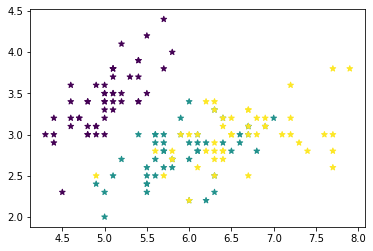

In [42]:
# Visualizando os dados
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, marker="*")

- Como temos três classes, vamos focar somente em uma para facilitar. 
- Vamos ficar apenas com as classes 0 e 1.

In [44]:
y_att = y.apply(lambda x: 0 if x == 0 else 1)

In [45]:
y_att

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int64

In [46]:
y_att.unique()

array([0, 1])

In [49]:
y_att.value_counts()

1    100
0     50
Name: target, dtype: int64

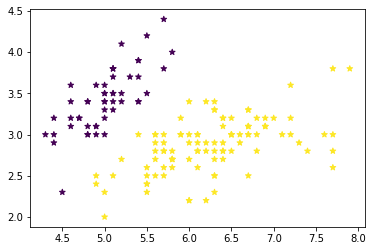

In [50]:
# Visualizando os dados atualizados
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_att, marker="*")

- Vemos que as classes são linearmente separáveis. 

In [54]:
from sklearn.model_selection import train_test_split 

In [55]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_att, test_size=0.2, random_state=123)

In [59]:
# Checando o tamanho dos conjuntos
print("Tamanho do conjunto de treino: {}".format(X_train.shape))
print("Tamanho do conjunto de teste: {}".format(X_test.shape))

Tamanho do conjunto de treino: (120, 4)
Tamanho do conjunto de teste: (30, 4)


### Criando o perceptron

In [51]:
from sklearn.linear_model import Perceptron 

In [60]:
per_clf = Perceptron(max_iter=1000, eta0=0.1)

In [61]:
# Treinando o modelo
per_clf.fit(X_train, y_train)

Perceptron(eta0=0.1)

In [62]:
# Fazendo predições
y_pred = per_clf.predict(X_test)

In [67]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix
)

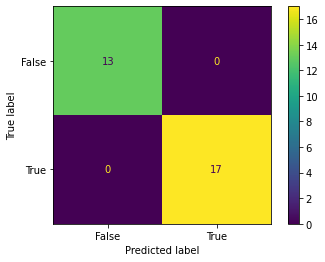

In [70]:
# Avaliando o modelo
  
# Calculate confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True]) 
  
cm_display.plot() 
plt.show()

In [71]:
# Acurácia
acc_test = accuracy_score(y_pred, y_test)
print('Acurácia no conjunto de teste: {}'.format(acc_test))

Acurácia no conjunto de teste: 1.0


## Exercício
- Treinar um perceptron para a nossa base de dados de câncer de mama que temos em .csv.
- Usar diferentes valores dos hiperparâmetros.

# Exemplo 03: Usando o tensorflow 2 e keras

-> keras e tensorflow são utilizados para treinamento de modelos de deep learning, como as redes neurais. 

- Lembrar de instalar keras e tensorflow:

```{python}
# Requires the latest pip
pip install --upgrade pip

# Current stable release for CPU and GPU
pip install tensorflow

pip install --upgrade keras
```

In [74]:
import tensorflow as tf
from tensorflow import keras

In [75]:
tf.__version__

'2.8.0'

In [76]:
keras.__version__

'2.8.0'

## Dados

In [77]:
fashion_mnist = keras.datasets.fashion_mnist

In [78]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [81]:
X_train_full.shape # 60.000 imagens, onde cada imagem é uma matriz de 28x28 pixels.
# Ver imagens no Google: fashion_mnist

(60000, 28, 28)

In [83]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

- Os dados já estão divididos em treino e teste, mas não em validação. 
- Vamos reescalar a intensidade do pixel no range 0-1, por isso dividimos por 255.0 para que seja um float. 

In [84]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [85]:
# Lista com o nome das classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
              "Bag", "Ankle boot"]

In [88]:
# Olhando o primeiro nome no conjunto de treino
class_names[y_train[0]]

'Coat'

## Modelo

In [89]:
model = keras.models.Sequential() # modelo sequencial
model.add(keras.layers.Flatten(input_shape=[28, 28])) # primeira camada - preprocessing
model.add(keras.layers.Dense(300, activation="relu")) # camada escondida com 300 neuronios
model.add(keras.layers.Dense(100, activation="relu")) # camada escondida com 100 neuronios
model.add(keras.layers.Dense(10, activation="softmax")) 

2024-06-07 07:56:36.470595: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Explicação dos Componentes do Output

- Model: Nome do modelo. Neste caso, o nome é "sequential" porque o modelo foi criado usando a API Sequential.
Layer (type)

- Layer: Nome da camada no modelo.
(type): Tipo da camada. No exemplo, todas as camadas são do tipo Dense.
Output Shape

- Output Shape: Forma da saída da camada. Isso indica a dimensionalidade do tensor de saída produzido por essa camada. Por exemplo, (None, 128) significa que a saída é um tensor bidimensional onde a primeira dimensão (None) representa o tamanho do batch e a segunda dimensão (128) representa o número de unidades na camada Dense.

- Param #: Número de parâmetros treináveis na camada. Este valor é calculado com base na fórmula específica para o tipo de camada. Para uma camada Dense, o número de parâmetros é igual ao produto do número de unidades na camada de entrada e na camada de saída, mais o número de biases.

### Componentes Detalhados

#### Nome da Camada

É o nome dado à camada quando ela foi adicionada ao modelo. Se um nome específico não for fornecido, Keras gera um nome automaticamente.
Tipo da Camada

Indica o tipo da camada (por exemplo, Dense, Conv2D, LSTM). Este é o tipo específico de operação que a camada realiza.

#### Output Shape

Esta coluna mostra a forma do tensor de saída de cada camada. A primeira dimensão é None, o que indica que o tamanho do batch pode variar. As outras dimensões correspondem às saídas específicas da camada.
Param #

Esta coluna mostra o número total de parâmetros que a camada tem. No caso de uma camada Dense, isso inclui os pesos e os biases.

- Para a primeira camada Dense no exemplo:
A camada tem 128 unidades e a entrada tem 784 características (28x28 pixels), então o número de parâmetros é: 
784 × 128 + 128 = 100480

- Para a segunda camada Dense:
A camada tem 64 unidades e recebe uma entrada de 128 unidades, então o número de parâmetros é: 

$$128×64+64=8256$$

- Para a terceira camada Dense:
A camada tem 10 unidades e recebe uma entrada de 64 unidades, então o número de parâmetros é: 
64×10+10=650.

### Total params, Trainable params, Non-trainable params

- Total params: O número total de parâmetros no modelo, tanto treináveis quanto não treináveis.
- Trainable params: O número de parâmetros que serão ajustados durante o treinamento.
- Non-trainable params: Parâmetros que não serão ajustados durante o treinamento. Esses parâmetros podem ser fixos (por exemplo, parâmetros de camadas congeladas durante o fine-tuning).


- Os parâmetros de cada uma das camadas podem ser acessados:

In [94]:
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()

In [95]:
print('Pesos: {}'.format(weights))
print('Vieses: {}'.format(biases))

Pesos: [[-0.02755627 -0.04540813 -0.03305183 ...  0.0390389  -0.05343337
   0.02736215]
 [-0.01877087 -0.04015987 -0.00624581 ... -0.03094777  0.03881963
  -0.02077628]
 [-0.03633283 -0.03175865 -0.03872652 ... -0.04803801  0.04849545
   0.02601946]
 ...
 [ 0.06747974  0.05512513 -0.04335924 ... -0.04821101  0.00549739
   0.05311678]
 [ 0.01005786  0.05658017 -0.00174076 ...  0.02040275 -0.03000667
   0.06967583]
 [ 0.06577851  0.02940922 -0.05638215 ... -0.06883249  0.05862568
   0.05610666]]
Vieses: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

- Aqui, decidimos como o modelo será treinado. 

In [96]:
# Compilando o modelo
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics="accuracy")

Componentes do Código

- `loss="sparse_categorical_crossentropy"`
    - `loss`: Especifica a função de perda (loss function) que será usada durante o treinamento para avaliar a diferença entre as previsões do modelo e os rótulos reais.
    - `sparse_categorical_crossentropy`: Esta função de perda é usada para problemas de classificação multi-classe onde os rótulos são fornecidos como inteiros (rótulos esparsos) em vez de vetores one-hot. É adequada para casos onde as classes são mutuamente exclusivas, e você tem mais de duas classes.

- `optimizer="sgd"`
    - `optimizer`: Especifica o algoritmo de otimização que será usado para atualizar os pesos do modelo com base na função de perda calculada.
    - `sgd`: Stochastic Gradient Descent (Descida do Gradiente Estocástica). É um método de otimização que ajusta iterativamente os pesos do modelo com base no gradiente da função de perda. O SGD é uma escolha comum por sua simplicidade e eficiência, mas pode ser sensível à escolha da taxa de aprendizado.

- `metrics="accuracy"`
    - `metrics`: Especifica as métricas que serão avaliadas durante o treinamento e a avaliação do modelo. As métricas não afetam diretamente o processo de treinamento, mas fornecem informações adicionais sobre o desempenho do modelo.
    - `accuracy`: A métrica de acurácia mede a proporção de previsões corretas feitas pelo modelo. É uma métrica comum para problemas de classificação, onde o objetivo é maximizar a proporção de rótulos previstos corretamente.

## Treino e validação do modelo

In [97]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7243 - accuracy: 0.7582 - val_loss: 0.5141 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4919 - accuracy: 0.8283 - val_loss: 0.4555 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4443 - accuracy: 0.8434 - val_loss: 0.4268 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4145 - accuracy: 0.8554 - val_loss: 0.4016 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3943 - accuracy: 0.8606 - val_loss: 0.3898 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3778 - accuracy: 0.8678 - val_loss: 0.3794 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3650 - accuracy: 0.8714 - val_loss: 0.3631 - val_accuracy:

- A perda vai caindo com as iterações, e a acurácia da validação não está tão longe da acurácia do treino, então podemos dizer que não houve overfitting. 
- Vamos ver os resultados graficamente:

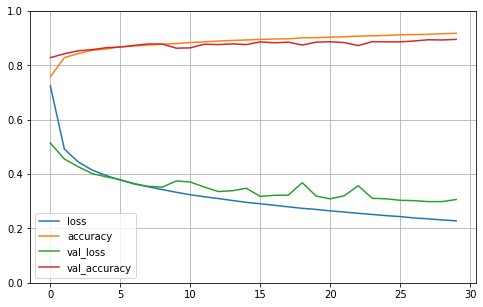

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [100]:
# Avaliando o modelo no conjunto de teste
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 82.9558 - accuracy: 0.8239


[82.95576477050781, 0.8238999843597412]

## Usando o modelo para fazer predição

In [102]:
X_new = X_test[:3] # primeiras 3 observações da base de teste

In [103]:
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [104]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- Vemos uma probablidade por classe (da 0 a 9). 
- Podemos ver a que tipo de peça se refere cada um.

In [106]:
y_probabilities = model.predict(X_new)
y_pred = y_probabilities.argmax(axis=-1)
print(y_pred)

[9 2 1]


In [107]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [108]:
# Checando se o modelo acertou
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

- O modelo acertou corretamente o tipo de peça. 